## Introduction

This notebook will give a brief overview of some of the features available with the ndtamr module. 

In [1]:
import ndtamr.NDTree as nd
import ndtamr.AMR as amr
import ndtamr.Vis as vis
import ndtamr.Data as data

### Setting up your data
We can define any type of data that we want to feed to the NDTAMR module. There are some example Data models in the ndtamr.Data module. For now we'll create a simple 2D model of a spiral. 

All data classes must inherit from the ndtamr.Data.GenericData class.

In [2]:
from ndtamr.Data import GenericData
import numpy as np
class Spiral2D(GenericData):
    """
    2D test class which consists of a one-armed spiral.
    """
    data_cols = ['value']
    def __init__(self,coords=(0,0),file=None,data=None):
        GenericData.__init__(self,coords=coords,file=file,data=data)

    def func(self):
        """Function which sets the data value"""
        xc,yc = self.coords
        r = np.sqrt( xc**2 + yc**2)
        p = np.arctan2(yc,xc)
        
        ps = np.log(r/1)/.2
        xs = r*np.cos(ps)
        ys = r*np.sin(ps)
        res = np.exp(-((xc-xs)**2 + (yc-ys)**2)/(2*.3**2))
        if np.isnan(res) or np.isinf(res):
            res = 1
        return res
    def get_refinement_data(self):
        """Returns the data column which we want to refine on."""
        return self.value

### Initializing the Tree

Once we have our Data class defined, we can create an instance of the tree structure which holds our data. The ndtamr.NDTree module contains some useful functions which create trees to a certain depth. 

To start let's make a uniform grid of $2^4 \times 2^4$ points.

In [3]:
t = nd.make_uniform(depth=4,
                  dim=2,
                  data_class=Spiral2D,
                  xmin=(-2,-2),xmax=(2,2),
                  restrict_func=nd.restrict_datafunc,prolongate_func=nd.prolongate_datafunc)

/tmp/ipykernel_310320/2952290962.py:17: RuntimeWarning: divide by zero encountered in log
  ps = np.log(r/1)/.2
/tmp/ipykernel_310320/2952290962.py:18: RuntimeWarning: invalid value encountered in cos
  xs = r*np.cos(ps)
/tmp/ipykernel_310320/2952290962.py:19: RuntimeWarning: invalid value encountered in sin
  ys = r*np.sin(ps)


When creating the tree, we specified the data class, the dimensions of the space, and how we want NDTAMR to handle moving data between different refinement levels. 


### Visualizing the Tree

The ndtamr.Vis module contains functions to visualize our data. For 2D domains, we can use the vis.plot function to make a simple visualization.

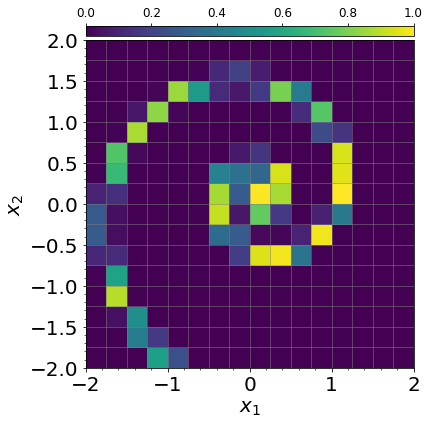

In [4]:
vis.plot(t,grid=True);

### Refining the Tree

If we want more detail in the above image, we can refine areas where the data is changing rapdily. The refinement producedures are handled in the ndtamr.AMR module. To move one level down in refinement we can call the refine function.

/tmp/ipykernel_310320/2952290962.py:17: RuntimeWarning: divide by zero encountered in log
  ps = np.log(r/1)/.2
/tmp/ipykernel_310320/2952290962.py:18: RuntimeWarning: invalid value encountered in cos
  xs = r*np.cos(ps)
/tmp/ipykernel_310320/2952290962.py:19: RuntimeWarning: invalid value encountered in sin
  ys = r*np.sin(ps)


13936 points out of 512^2 = 262144 for full grid
You have saved a factor of 18.81
With a compression factor of 94.68%


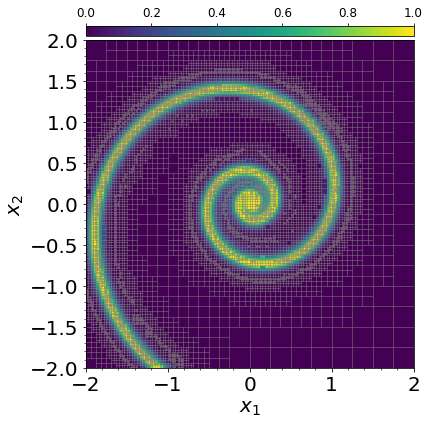

In [9]:
amr.refine(t,tol=.8,extent=2,min_value=1e-4)
amr.compression(t)
vis.plot(t,grid=True);

Note that we also printed out some information about the refinement with the amr.compression function. If we want more information we can set the show flag in amr.refine to True.

/tmp/ipykernel_309946/2952290962.py:17: RuntimeWarning: divide by zero encountered in log
  ps = np.log(r/1)/.2
/tmp/ipykernel_309946/2952290962.py:18: RuntimeWarning: invalid value encountered in cos
  xs = r*np.cos(ps)
/tmp/ipykernel_309946/2952290962.py:19: RuntimeWarning: invalid value encountered in sin
  ys = r*np.sin(ps)


Minimum: 1.0621020988034312e-41
Maximum: 0.9897427569950058
Median: 0.3988313174768237
Average: 0.4269620850591669


AttributeError: 'Polygon' object has no property 'normed'

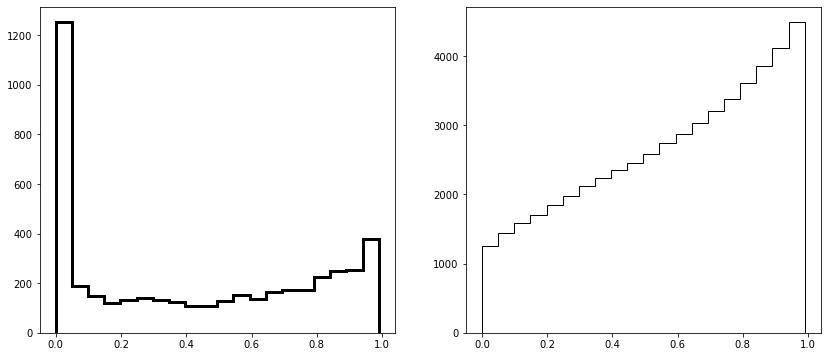

In [10]:
amr.refine(t,tol=.8,extent=2,min_value=1e-4,show=True)

The first two plots shows the distribution and cumulative distribution for the refinement criterion. The bottom plot marks which cells satisfied the refinement criterion. 

### A 3D example

Let's extend our 2D spiral to a 3D spiral by tapering it off above and below the plane. We define a new data class,


In [11]:
class Spiral3D(GenericData):
    """
    3D test class which consists of a one-armed spiral that follows a
    gaussian distrubtion in the vertical direction.
    """
    data_cols = ['value']
    def __init__(self,coords=(0,0,0),file=None,data=None):
        GenericData.__init__(self,coords=coords,file=file,data=data)
        
    def func(self):
        """Function which sets the data value"""
        xc,yc,zc = self.coords
        r = np.sqrt( xc**2 + yc**2)
        p = np.arctan2(yc,xc)
        
        ps = np.log(r/1)/.2
        xs = r*np.cos(ps)
        ys = r*np.sin(ps)
        res = np.exp(-((xc-xs)**2 + (yc-ys)**2)/(2*.3**2))
        if np.isnan(res) or np.isinf(res):
            res = 1
        return res * np.exp(-zc**2/(2*.4**2))
    def get_refinement_data(self):
        """Returns the data column which we want to refine on."""
        return self.value

and create a new tree of size $2^4 \times 2^4 \times 2^4$,

In [ ]:
t = nd.make_uniform(depth=4,
                  dim=3,
                  data_class=Spiral3D,
                  xmin=(-2,-2,-2),xmax=(2,2,2),
                  restrict_func=nd.restrict_datafunc,prolongate_func=nd.prolongate_datafunc)

To visualize our 3D dataset, we can pass slice arguments to the vis.plot function and show only two dimensions at a time. 

In [ ]:
import matplotlib.pyplot as plt

fig,axes = plt.subplots(1,3,figsize=(18,6))
vis.plot(t,grid=True,dims=[0,1],slice_=[(-1,0)],fig=fig,ax=axes[0]);
vis.plot(t,grid=True,dims=[0,2],slice_=[(1,0)],fig=fig,ax=axes[1]);
vis.plot(t,grid=True,dims=[1,2],slice_=[(0,0)],fig=fig,ax=axes[2]);

Now let's refine our 3D spiral as before.

In [ ]:
amr.refine(t,tol=.8)
amr.compression(t)

In [ ]:
fig,axes = plt.subplots(1,3,figsize=(18,6))
vis.plot(t,grid=True,dims=[0,1],slice_=[(-1,0)],fig=fig,ax=axes[0]);
vis.plot(t,grid=True,dims=[0,2],slice_=[(1,0)],fig=fig,ax=axes[1]);
vis.plot(t,grid=True,dims=[1,2],slice_=[(0,0)],fig=fig,ax=axes[2]);
fig.tight_layout()

### Reducing dimensions
If we don't want to slice the data, but still want to visualize two dimensions at a time, we can integrate along the last dimension with the integrate keyword argument. 

In [ ]:
fig,axes = plt.subplots(1,3,figsize=(18,6))
vis.plot(t,grid=True,dims=[0,1],integrate=2,fig=fig,ax=axes[0]);
vis.plot(t,grid=True,dims=[0,2],integrate=1,fig=fig,ax=axes[1]);
vis.plot(t,grid=True,dims=[1,2],integrate=0,fig=fig,ax=axes[2]);
fig.tight_layout()


The ndtamr.Vis module also contains a routine to make a contour plot of the data.

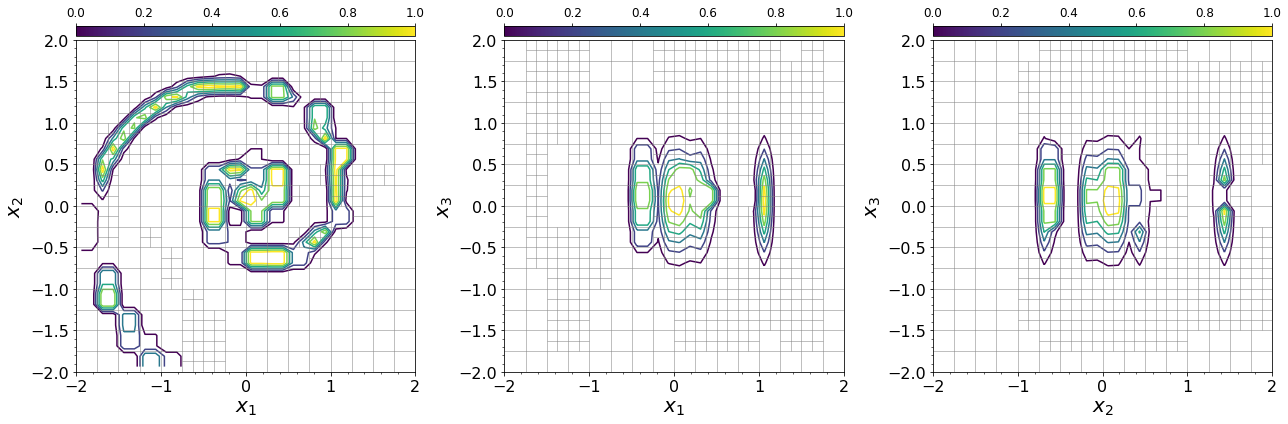

In [13]:
fig,axes = plt.subplots(1,3,figsize=(18,6))
vis.contour(t,grid=True,dims=[0,1],slice_=[(-1,0)],fig=fig,ax=axes[0]);
vis.contour(t,grid=True,dims=[0,2],slice_=[(1,0)],fig=fig,ax=axes[1]);
vis.contour(t,grid=True,dims=[1,2],slice_=[(0,0)],fig=fig,ax=axes[2]);
fig.tight_layout()

Finally, let's refine down to a level of $2^{10} \times 2^{10} = 1024 \times 1024$.

In [14]:
t = nd.make_uniform(depth=3,
                  dim=2,
                  data_class=Spiral2D,
                  xmin=(-2,-2),xmax=(2,2),
                  restrict_func=nd.restrict_datafunc,prolongate_func=nd.prolongate_datafunc)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in cos
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in sin


In [15]:
while t.depth() < 10:
    amr.refine(t,tol=.6)
    amr.compression(t)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in cos
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in sin


220 points out of 16^2 = 256 for full grid
You have saved a factor of 1.16
With a compression factor of 14.06%
703 points out of 32^2 = 1024 for full grid
You have saved a factor of 1.46
With a compression factor of 31.35%
1969 points out of 64^2 = 4096 for full grid
You have saved a factor of 2.08
With a compression factor of 51.93%
5263 points out of 128^2 = 16384 for full grid
You have saved a factor of 3.11
With a compression factor of 67.88%
13294 points out of 256^2 = 65536 for full grid
You have saved a factor of 4.93
With a compression factor of 79.71%
24169 points out of 512^2 = 262144 for full grid
You have saved a factor of 10.85
With a compression factor of 90.78%
34063 points out of 1024^2 = 1048576 for full grid
You have saved a factor of 30.78
With a compression factor of 96.75%


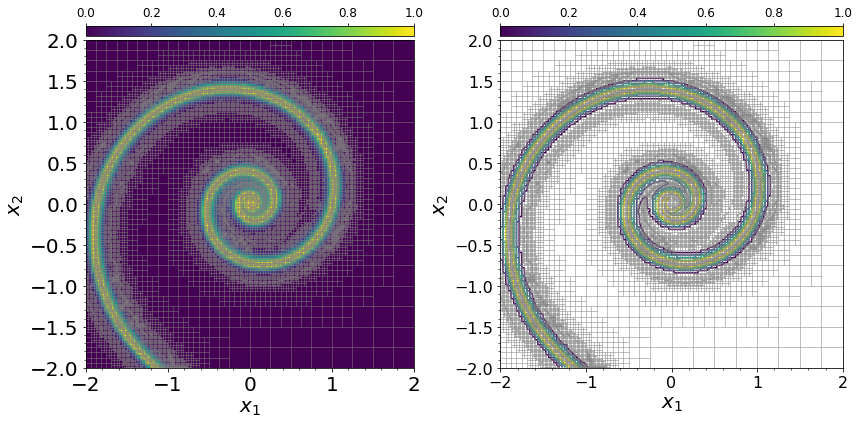

In [16]:
fig,axes = plt.subplots(1,2,figsize=(12,6))
vis.contour(t,grid=True,fig=fig,ax=axes[1])
vis.plot(t,grid=True,fig=fig,ax=axes[0])
fig.tight_layout()
